[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prokaj/elte-python-2023/blob/main/2023-11-13.ipynb)   

Néhány import amit később használni fogunk:

In [1]:
import importlib
import math
import graphviz

if importlib.util.find_spec('ipytest') is None:
    ! pip install --quiet ipytest

import ipytest

ipytest.autoconfig()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00


# Házi feladat

Implementáljuk a `RandomNames` osztályt.

A egyedeknek legyen egy `names` property-je, ami olvasáskor a névsort az
eredeti sorrendben adja vissza, és íráskor beállítja az új névsort. A
`RandomNames` legyen iterálható és az `__iter__` metódusa egy végtelen
generátort adjon vissza, ami véletlen sorrendben megy végig a neveken,
ha végig ért akkor újra kezdi újrasorsolt véletlen sorrendben. Az
egyedek legyenek függvényszerűek is (`__call__` metódus). A függvény
hívás eredménye legyen egyetlen találomra választott név a névsorból.

Emlékeztető: Egy osztályban a `@property` dekorátorral tudunk property
mezőt létrehozni. A dekorált függvény szolgál a mező kiolvasára. Ha
írhatóvá szeretnénk tenni a mezőt, akkor a `mezőnév.setter` dekorátort
kell használni.

Pl.
```python
class RandomNames:
    
    @property
    def names(self):
        pass
   
    @names.setter
    def names(self, new_value):
        pass

```

A `names` mező írásakor végezzen ellenőrzést a függvény. Azaz ha nem
sztringekből álló sorozattal hívjuk meg, akkor dobjon `TypeError`-t. A
kapott nevek első betűjét írja át nagy betűvé, a többit viszont írja át
kis betűre. Figyeljünk arra, hogy `rn.names = 'Attila'` hibát kell, hogy
dobjon, de a sorozat nem csak lista lehet, hanem bármi amin végig lehet
iterálni!

Pl.
```python
    rn = RandomNames(['anDoR'])
    rn.names # -> ['Andor']
    rn.names = ['ALADÁR', 'elemér']
    rn.names # -> ['Aladár', 'Elemér']
```

A véletlenszerű sorrend előállításához használhatjuk a `random` modul,
`shuffle` függvényét. Figyeljünk arra, hogy ez elronthatja az eredeti
sorrendet!

Inicializáláskor az egyed kap egy névsort. Ezt kezelje úgy, mintha
`names` tulajdonságot írtuk volna!

Írjunk teszt függvényt! Ez ellenőrizze az inicializálást, ill. `names`
tulajdonság írását, olvasását. Úgy is, hogy a kettő között az iterátort
is használtuk.



In [6]:
import random


class RandomNames:

    def __init__(self, names):
        self.names = names

    @property
    def names(self):
        return list(self._names)
        pass

    @names.setter
    def names(self, new_value):
        if isinstance(new_value, str):
            raise TypeError
        try:
            new_value = [value.capitalize() for value in  new_value]
        except:
            raise TypeError
        self._names = new_value

    def __iter__(self):
        names = self.names
        while True:
            random.shuffle(names)
            yield from names

    def __call__(self):
        return random.choice(self._names)

    def __str__(self):
        return self.names

    def __repr__(self):
        return f"{type(self).__name__}({self.names})"

In [10]:
%%ipytest
from collections import Counter

from pytest import raises

def test_typeerror():
    with raises(TypeError):
        RandomNames("Aladár")

    with raises(TypeError):
        RandomNames([1,2,3])

    rn = RandomNames([])
    with raises(TypeError):
        rn.names = [1, 2]

    with raises(TypeError):
        rn.names = "Aladár"

def test_init():
    names = ["AlAdÁr", "jáNos"]
    cap_names = [name.capitalize() for name in names]

    rn = RandomNames(names)
    assert rn.names == cap_names

    names.append("elemér")

    assert rn.names == cap_names

    it = iter(rn)
    next(it)

    assert rn.names == cap_names

    next(it)
    assert rn.names == cap_names


def test_call():
    names = ["AlAdÁr", "jáNos"]
    cap_names = [name.capitalize() for name in names]
    rn = RandomNames(names)
    assert rn() in cap_names
    assert rn.names == cap_names

    n = 1000
    cnt = Counter(rn() for _ in range(2*n))
    assert tuple(cnt.keys()) == tuple(rn.names)
    test_stat = sum(((c-n)**2)/n for c in cnt.values())
    assert test_stat < 1.96**2 ## kb. 5%-os tévedés

def test_names():
    rn = RandomNames([])
    names = ["AlAdÁr", "jáNos"]
    rn.names = names
    assert rn.names == [name.capitalize() for name in names]

def test_randomness():
    """????"""
    pass

.....                                                                                        [100%]
5 passed in 0.04s


In [12]:
from itertools import islice

rn = RandomNames(("Micimackó", "Füles", "Róbert gida", "tigris", "malacka"))

print("calling `rn`")
for _ in range(10):
    print(f"{rn()=}")

print("iterating over `rn`")
for name in islice(rn, 10):
    print(f"{name=}")

print("iterating over `rn` in pair")
for name1, name2 in islice(zip(rn, rn), 10):
    print(f"{name1=:>20}, {name2=:>20}")


calling `rn`
rn()='Malacka'
rn()='Róbert gida'
rn()='Malacka'
rn()='Róbert gida'
rn()='Micimackó'
rn()='Tigris'
rn()='Micimackó'
rn()='Micimackó'
rn()='Malacka'
rn()='Füles'
iterating over `rn`
name='Füles'
name='Malacka'
name='Róbert gida'
name='Micimackó'
name='Tigris'
name='Tigris'
name='Róbert gida'
name='Micimackó'
name='Malacka'
name='Füles'
iterating over `rn` in pair
name1=           Micimackó, name2=               Füles
name1=         Róbert gida, name2=           Micimackó
name1=               Füles, name2=              Tigris
name1=              Tigris, name2=         Róbert gida
name1=             Malacka, name2=             Malacka
name1=             Malacka, name2=               Füles
name1=               Füles, name2=           Micimackó
name1=         Róbert gida, name2=              Tigris
name1=              Tigris, name2=             Malacka
name1=           Micimackó, name2=         Róbert gida


# Numpy (Numerikus python) könyvtár

  - [Numpy bevezető `w3schools`](https://www.w3schools.com/python/numpy/default.asp)


Előadáson volt szó róla. Nagyon sok könyvtár használja (`Pandas`, `Scipy`, `matplotlib`, `statmodels`, stb.).

 Általában, ha ,,tudományos'' számolásról van szó: vektorok, mátrixok, tömbök, akkor a háttérben a `numpy` van.

Legfontosabb típusa az `ndarray` (többdimenziós tömb)

In [ ]:
import numpy as np

In [ ]:
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

## `Numpy` tömb létrehozása


Listából, vagy tuple-ból.

Nézzük meg mit kapunk ha lista helyett generátorfüggvényt, `map` vagy `range` objektumot adunk meg


In [14]:
import numpy as np

In [15]:
x = np.array([1,2,3], dtype=np.int8)
print(f"{x.shape=}, {x.dtype=}, {x.strides=}, {x.ndim=}")

x.shape=(3,), x.dtype=dtype('int8'), x.strides=(1,), x.ndim=1


vagy adott méretű tömböt hozunk létre és azt utólag kitöltjük:

In [16]:
# x = np.zeros((2,3,4), dtype=np.float64)
x = np.ones((2, 3, 12), dtype=np.int32)

x

array([[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]], dtype=int32)

In [ ]:
print(f"{x.shape=}, {x.dtype=}, {x.strides=}, {x.ndim=}")

x.shape=(2, 3, 12), x.dtype=dtype('int32'), x.strides=(144, 48, 4), x.ndim=3


Véletlen értékekkel feltöltött tömb:

In [17]:
# találomra választott számok a (0,1)-ből
uniform = np.random.uniform(0, 1, size=(10, 10, 10))

# Gauss görbe, normális eloszlás

gauss = np.random.normal(0, 1, size=(10, 10, 10))

# np.random.rand(0, 1, size=(10, 10))

In [18]:
import matplotlib.pyplot as plt
import math

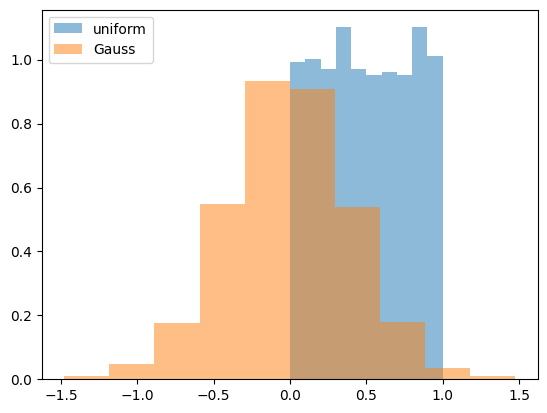

In [19]:
sqrt2pi = math.sqrt(2*math.pi)
plt.hist(uniform.reshape(-1), density=True, alpha=0.5, label="uniform")
plt.hist(gauss.reshape(-1)/sqrt2pi, density=True, alpha=0.5, label="Gauss")
plt.legend()
plt.show()

## Műveletek tömbökkel

### Jellemzők kiolvasása:

```
x = np.zeros((10,20))
```

- `x.shape` a tömb méretét adja meg
- `x.ndim` a dimenziók száma (`x.shape` hossza)
- `x.dtype` a tömb elemeinek típusa
- `x.stride`, `x.base`, `x.size` kevésbé érdekes számunkra

### Jellemzők megváltoztatása:

- `x.astype(np.uint8)` új tömböt ad vissza, amiben nem előjeles 8 bites számok fog lesznek.
- `x.reshape(-1)` egy dimenziós tömb az eredmény, a tartalom nem változik.
- `x.T` transzponálás, csak a `strides` paramétert változtatja (gyors).
- `x.transpose(1,0)` transzponálás másképp.

Mit méretű tömböt kapunk a következő sorral? Miért?

```python
x = np.zeros((10,20))
x.reshape((5,2,5,4)).transpose(0,2,1,3).reshape(25, -1)
```

In [20]:
x = np.zeros((10,20))
x.reshape((5,2,5,4)).transpose(0,2,1,3).reshape(25, -1).shape

(25, 8)

In [ ]:
import numpy as np

In [21]:
x = np.random.normal(0, 1, (4, 6))
print(f"{hex(id(x))=}, {x.shape=}, {x.ndim=}, {x.dtype=}, {x.strides=},  {x.base=}, {x.data=}")
y = x.reshape(-1)
print(f"{hex(id(y))=}, {y.shape=}, {y.ndim=}, {y.dtype=}, {y.strides=},  {hex(id(y.base))=}, {y.data=}")


hex(id(x))='0x7c65b44b0a50', x.shape=(4, 6), x.ndim=2, x.dtype=dtype('float64'), x.strides=(48, 8),  x.base=None, x.data=<memory at 0x7c65b539ea80>
hex(id(y))='0x7c65b440b090', y.shape=(24,), y.ndim=1, y.dtype=dtype('float64'), y.strides=(8,),  hex(id(y.base))='0x7c65b44b0a50', y.data=<memory at 0x7c65b46a6380>


In [22]:

y[y<0] = 0
print(x)

[[0.         2.06434921 1.60628624 1.1122411  0.03620824 0.05227887]
 [0.         0.38973612 0.         0.         0.         0.33172911]
 [0.80562056 0.         0.         0.         0.72426963 0.49655214]
 [1.3761465  0.         0.47775075 0.         0.         0.79802694]]


In [23]:
x = np.random.normal(0, 1, (5, 6))
print(f"{hex(id(x))=}, {x.shape=}, {x.ndim=}, {x.dtype=}, {x.strides=},  {x.base=}, {x.data=}")
y = x.astype(np.float32)
print(f"{hex(id(y))=}, {y.shape=}, {y.ndim=}, {y.dtype=}, {y.strides=},  {y.base=}, {y.data=}")

hex(id(x))='0x7c65b44b3f30', x.shape=(5, 6), x.ndim=2, x.dtype=dtype('float64'), x.strides=(48, 8),  x.base=None, x.data=<memory at 0x7c65b539ea80>
hex(id(y))='0x7c65b44b22b0', y.shape=(5, 6), y.ndim=2, y.dtype=dtype('float32'), y.strides=(24, 4),  y.base=None, y.data=<memory at 0x7c65b539eb50>


In [24]:
y[y<0] = 0
print(x)

[[ 5.43320063e-01  9.61380083e-01 -6.97975987e-01 -1.04575667e+00
   3.19762691e-01 -1.73622673e-01]
 [-7.42599920e-01 -2.51448759e-01  1.21057190e+00  2.14811915e-01
   6.96612333e-04  1.93266178e+00]
 [ 7.42020779e-01 -5.13402274e-01 -7.78916315e-02  1.42337625e+00
   1.26869093e+00  3.00215650e-01]
 [ 7.63906987e-01 -1.03015695e+00 -1.91245685e-01 -1.60631281e+00
  -1.19194400e-01  1.17512576e+00]
 [ 3.22502647e-01 -8.44605080e-02 -9.38675205e-01  2.05075705e+00
   2.13267282e+00 -1.07760545e-01]]


In [26]:
x = x.round(3)
print(x)
print(x.transpose(1,0))


[[ 5.430e-01  9.610e-01 -6.980e-01 -1.046e+00  3.200e-01 -1.740e-01]
 [-7.430e-01 -2.510e-01  1.211e+00  2.150e-01  1.000e-03  1.933e+00]
 [ 7.420e-01 -5.130e-01 -7.800e-02  1.423e+00  1.269e+00  3.000e-01]
 [ 7.640e-01 -1.030e+00 -1.910e-01 -1.606e+00 -1.190e-01  1.175e+00]
 [ 3.230e-01 -8.400e-02 -9.390e-01  2.051e+00  2.133e+00 -1.080e-01]]
[[ 5.430e-01 -7.430e-01  7.420e-01  7.640e-01  3.230e-01]
 [ 9.610e-01 -2.510e-01 -5.130e-01 -1.030e+00 -8.400e-02]
 [-6.980e-01  1.211e+00 -7.800e-02 -1.910e-01 -9.390e-01]
 [-1.046e+00  2.150e-01  1.423e+00 -1.606e+00  2.051e+00]
 [ 3.200e-01  1.000e-03  1.269e+00 -1.190e-01  2.133e+00]
 [-1.740e-01  1.933e+00  3.000e-01  1.175e+00 -1.080e-01]]


## Elemenkénti műveletek

Amit megszoktunk, hogy számokkal működik, tömbökkel (`np.array`) is fog.
pl.


In [27]:
x = np.random.standard_normal((2, 3))
y = np.random.standard_normal((2, 3))
x, y, x+y, x*y, x-y, x/y, x//y, x**2

(array([[ 0.7586774 ,  0.55391306, -0.22030369],
        [ 0.14030272, -0.57553149, -0.39359379]]),
 array([[-0.47638969, -0.57887316,  0.52897159],
        [-0.79340835,  0.98011399,  1.8932428 ]]),
 array([[ 0.28228771, -0.0249601 ,  0.3086679 ],
        [-0.65310563,  0.4045825 ,  1.49964901]]),
 array([[-0.36142609, -0.3206454 , -0.11653439],
        [-0.11131735, -0.56408647, -0.7451686 ]]),
 array([[ 1.23506709,  1.13278622, -0.74927528],
        [ 0.93371107, -1.55564549, -2.28683658]]),
 array([[-1.59255631, -0.95688157, -0.41647547],
        [-0.17683545, -0.58720873, -0.20789398]]),
 array([[-2., -1., -1.],
        [-1., -1., -1.]]),
 array([[0.5755914 , 0.30681968, 0.04853372],
        [0.01968485, 0.3312365 , 0.15491607]]))

Matematikai függvények is alkalmazhatóak, többnyire `np.` előtaggal.

pl.

In [28]:
x = np.random.standard_normal((2, 3))
np.exp(x), np.abs(x), np.log(np.abs(x))


(array([[0.57881119, 0.33395507, 1.46564396],
        [4.44332079, 0.3326733 , 0.49009905]]),
 array([[0.54677896, 1.09674882, 0.38229471],
        [1.49140202, 1.10059434, 0.71314776]]),
 array([[-0.60371066,  0.09235019, -0.96156347],
        [ 0.39971663,  0.09585034, -0.33806664]]))

Ezeknek a függvényeknek van `out` és `where` paraméterük.

In [ ]:
x = np.arange(10).reshape(2,-1)
y = np.ones_like(x)
np.add(y, x, out=y, where=x>5)
print(y)

[[ 1  1  1  1  1]
 [ 1  7  8  9 10]]


## Összegzés, szorzás, max, min (redukció)

`for` ciklus helyett egy tömb összegét, maximumát, szorzatát stb. a megfelelő metódus meghívásával is ki lehet számolni.

- Gyorsabb
- Kevesebb hiba lehetőség
- Olvashatóbb

Ezeknek a függvényeknek két szokásos extra paramétere van: `axis`, `keepdims`

Alapértelmezésben a teljes tömböt egy számra redukálják, ha az `axis` meg van adva, akkor az adott tengely mentén redukálnak.

Példák:

In [29]:
x = np.arange(75).reshape(3,5,5)

print(f"{x.sum()=}")
print(f"{x.sum(axis=1).shape=}")
print(f"{x.sum(axis=(1,2)).shape=}")
print(f"{x.sum(axis=(1,2), keepdims=True).shape=}")


x.sum()=2775
x.sum(axis=1).shape=(3, 5)
x.sum(axis=(1,2)).shape=(3,)
x.sum(axis=(1,2), keepdims=True).shape=(3, 1, 1)


További példák

In [30]:
x = np.random.uniform(size=(2, 3))

with np.printoptions(precision=4):
    for op in [np.max, np.min, np.sum,  np.cumsum, np.prod, np.cumprod]:
        # op_name = f"np.{op.__name__}"
        print(f"op={op.__name__}")
        print(f"{op(x)=}")
        print(f"{op(x, axis=0)=}")
        if not op.__name__.startswith("cum"):
            print(f"{op(x, axis=0, keepdims=True)=}")
        print("="*50)




op=amax
op(x)=0.9692018035466725
op(x, axis=0)=array([0.894 , 0.672 , 0.9692])
op(x, axis=0, keepdims=True)=array([[0.894 , 0.672 , 0.9692]])
op=amin
op(x)=0.2582548281216378
op(x, axis=0)=array([0.5523, 0.3045, 0.2583])
op(x, axis=0, keepdims=True)=array([[0.5523, 0.3045, 0.2583]])
op=sum
op(x)=3.650206013160158
op(x, axis=0)=array([1.4463, 0.9765, 1.2275])
op(x, axis=0, keepdims=True)=array([[1.4463, 0.9765, 1.2275]])
op=cumsum
op(x)=array([0.894 , 1.566 , 2.5352, 3.0875, 3.392 , 3.6502])
op(x, axis=0)=array([[0.894 , 0.672 , 0.9692],
       [1.4463, 0.9765, 1.2275]])
op=prod
op(x)=0.025286570122206888
op(x, axis=0)=array([0.4937, 0.2046, 0.2503])
op(x, axis=0, keepdims=True)=array([[0.4937, 0.2046, 0.2503]])
op=cumprod
op(x)=array([0.894 , 0.6007, 0.5822, 0.3216, 0.0979, 0.0253])
op(x, axis=0)=array([[0.894 , 0.672 , 0.9692],
       [0.4937, 0.2046, 0.2503]])


Mint mindig ha valamire nem emlékszünk a dokumentáció segít:

pl.
```
help(np.sum)
```

## Véletlenszám generálás

Ezek a függvények az `np.random` modulban vannak

Legfontosabbak:

- `np.random.uniform(a, b, size=(10,10))` `size` méretű tömb, minden elem találomra választott szám `(a,b)`-ből
- `np.random.normal(mu, sigma, size=(10,10))` `size` méretű tömb, minden elem normális eloszlású $\mu$ eltolás $\sigma$ skála paraméterrel.
- `np.random.

In [ ]:
print(f"    {np.random.uniform(0, 1, 5)=}")
print(f"     {np.random.normal(0, 1, 5)=}")
print(f"{np.random.binomial(10, 0.5, 5)=}")
print(f"{np.random.binomial( 1, 0.5, 5)=}")
print(f"{np.random.permutation(5)=}")

    np.random.uniform(0, 1, 5)=array([0.7829767 , 0.96801413, 0.84239993, 0.69391017, 0.55908334])
     np.random.normal(0, 1, 5)=array([-0.19338392,  0.34767466,  0.6045971 , -0.26556485,  0.5762892 ])
np.random.binomial(10, 0.5, 5)=array([5, 5, 4, 3, 4])
np.random.binomial( 1, 0.5, 5)=array([0, 1, 1, 1, 0])
np.random.permutation(5)=array([2, 0, 4, 1, 3])


Reprodukálhatóság:

In [ ]:
np.random.seed(3)
print(f"{np.random.binomial( 1, 0.5, 5)=}")
np.random.seed(3)
print(f"{np.random.binomial( 1, 0.5, 5)=}")
np.random.seed(3)
print(f"{np.random.binomial( 1, 0.5, 5)=}")


np.random.binomial( 1, 0.5, 5)=array([1, 1, 0, 1, 1])
np.random.binomial( 1, 0.5, 5)=array([1, 1, 0, 1, 1])
np.random.binomial( 1, 0.5, 5)=array([1, 1, 0, 1, 1])


A `seed`-et egyszer szokás beállítani a notebook elején.

## Indexelés

A szokásos `slice` jelölés mellett logikai vektor is lehet index és lista is.

In [31]:
with np.printoptions(linewidth=110, precision=4):
    x = np.random.normal(0, 1, 10)
    print(f"{x=}")
    print(f"{x>0.2=}")
    print(f"{x[x>0.2]=}")
    print(f"{x[[1,3,9]]=}")


x=array([-1.1173,  1.3507,  2.1186, -0.5102,  0.5918, -0.5974,  0.1864, -1.1868,  0.6039, -0.9274])
x>0.2=array([False,  True,  True, False,  True, False, False, False,  True, False])
x[x>0.2]=array([1.3507, 2.1186, 0.5918, 0.6039])
x[[1,3,9]]=array([ 1.3507, -0.5102, -0.9274])


## Broadcasting

Azonos méretű tömböket összeadhatunk, szorozhatunk.

Két tömb `a` és `b` kompatibilis, ha

- `a.ndim=len(a.shape)` és `b.ndim=len(b.shape)` azonos
- és `a.shape[i] == b.shape[i]` vagy az egyik 1


pl. `a = np.zeros((1, 1, 3))` és ` c = np.zeros((2, 3, 3))` kompatibilis, de egyik sem kompatibilis a `c = np.zeros((2, 3, 1))` tömbbel.

Kompatibilis tömbökkel is lehet műveleteket végezni, ahol az alak 1, ott az érték ismétlődik.

In [34]:
a = np.arange(1,10).reshape(1, 9) ## sorvektor
b = np.arange(1,10).reshape(9, 1) ## oszlopvektor
a*b

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

Két tömb kompatibilissé tehető, ha néhány 1-est a shape elé írva kompatibilis tömböt kapunk. Ilyen esetben is értelmesek a műveletek.

In [35]:
a = np.ones(10) ## sorvektor
b = np.ones((10, 1)) ## oszlopvektor
print(f"{a.shape=}, {b.shape=},\n{a*b=}")

a = np.ones(10) ## sorvektor
b = np.ones((10)) ## oszlopvektor
print(f"{a.shape=}, {b.shape=},\n{a*b=}")


a.shape=(10,), b.shape=(10, 1),
a*b=array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
a.shape=(10,), b.shape=(10,),
a*b=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


Ha új dimenziót akarunk a tömbhöz adni, azt `None`-nal is megtehetjük

In [36]:
a = np.ones((10,20))
print(f"{a.shape=}, {(a[None]).shape=}")

print(f"{a.shape=}, {(a[:,None]).shape=}")
print(f"{a.shape=}, {(a[...,None]).shape=}")

a.shape=(10, 20), (a[None]).shape=(1, 10, 20)
a.shape=(10, 20), (a[:,None]).shape=(10, 1, 20)
a.shape=(10, 20), (a[...,None]).shape=(10, 20, 1)


Olvashatóbb megoldás az `np.expand_dims` függvény használata.

## Tömbök összefűzése

- `np.concatenate`
- `np.stack`

Mindkettőnek hasonló, de a `stack` új dimenziót hoz létre és csak azonos méretű tömböket tud összerakni.


In [37]:
a = np.ones((1, 5))
b = np.ones((1, 2))

c = np.concatenate((a,b), axis=-1)
print(f"{c.shape=}")

d = np.stack((a, a, a), axis=1)
print(f"{d.shape=}")


c.shape=(1, 7)
d.shape=(1, 3, 5)


# Matplotlib könyvtár

Ez a leggyakrabban használt könyvtár ábrák készítéséhez.

- [Matplotlib bevezető `w3schools`](https://www.w3schools.com/python/matplotlib_intro.asp)

A `pyplot` modult általában `plt` alias-szal importáljuk.

Leggyakrabban használt függvények:

- `plt.plot`
- `plt.scatter`
- `plt.hist`
- `plt.imshow`

In [38]:
import matplotlib.pyplot as plt

[0 1 0 0 1 0 0 0 1 0]


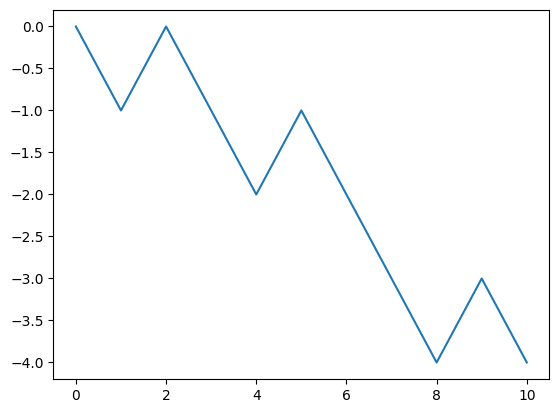

In [45]:
x =  np.random.binomial(1, 0.5, 10)
print(x)
y = np.concatenate(([0], (2*x-1).cumsum()))
plt.plot(y)
plt.show()

Próbáljuk ki mi történik, ha a második argumentum egy string, pl. "o-r", vagy "o:g"

A pontok `x,y` koordinátáját színét és méretét is megadhatjuk:

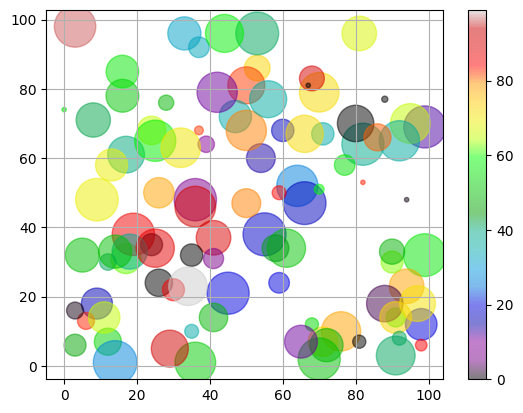

In [46]:

x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))
colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))

plt.grid()
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')

plt.colorbar()

plt.show()


### Hisztogram

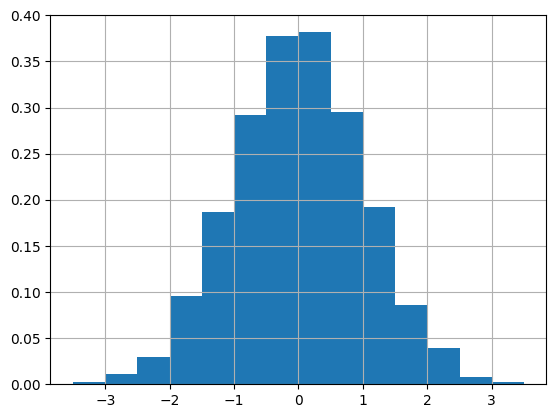

In [47]:
x = np.random.standard_normal(10000)
plt.hist(x, density=True, bins=np.linspace(-3.5, 3.5, 15))
plt.grid()
plt.show()

A `matplotlib` mellett más ábrakészítő könyvtárak is vannak:

- `seaborn`
- `plotly`
- `plotnine`

# Öröklődés

Előadáson szerepelt ehhez hasonló példa. Legyenek `Polygon`, `Rectangle`, `Square` osztályaink.
Minden négyzet téglalap és minden téglalap sokszög. Egy sokszöget a csúcsok felsorolásával adhatunk meg.
Ebből a kerület, terület kiszámolható és eldönthető, hogy a sokszög konvex-e. Ha akarjuk pl. a `Matplotlib` könyvtárral ki is rajzolhatjuk a sokszöget.

Menetközben síkvektorokkal akarunk számolni. Erre kényelmes a `numpy` könyvtárat használni.

In [ ]:
import math
import numpy as np
from itertools import cycle

class Polygon:

    def __init__(self, nodes):
        self.nodes = nodes

    def area(self):
        if self.is_convex():
            nodes = np.array(self.nodes)
            nodes = nodes-nodes[0]
            area = 0
            for v1, v2 in zip(nodes[1:], nodes[2:]):
                area += abs(v1[0]*v2[1]-v1[1]*v2[0])
            return area
        else:
            raise NotImplementedError
            ## hf!

    def perimeter(self):
        total = 0
        p0 = self.nodes[-1]
        for p in self.nodes:
            total += np.linalg.norm(p-p0)
            p0 = p
        return total

    def is_convex(self):
        nodes = np.array(self.nodes + self.nodes[:1])
        edges = np.diff(nodes, axis=0)
        idx = np.array([i%len(edges) for i in range(1, len(edges)+1)])
        edges1 = edges[idx]
        sgn = (rotate90(edges) * edges1).sum(axis=1)
        return (min(sgn)*max(sgn)>=0)

    def draw(self):
        pass

    def __repr__(self):
        return f'{type(self).__name__}({[tuple(x) for x in self.nodes]})'


def rotate90(x):
    return np.flip(x, -1)*np.array([-1, 1])

class Rectangle(Polygon):

    def __init__(self, P1, P2, r):
        """
        P1, P2 froms an edge and r is the ratio of edge lengths.

        Assuming that e is P1P2 rotated counterclockwise by 90 degree
        the vertices are:
        P1, P2, P2+r*e, P1+r*e
        """
        v = rotate90(P2-P1)*r
        super(Rectangle, self).__init__([P1, P2, P2+v, P1+v])


class Square(Rectangle):

    def __init__(self, P1, P2):
        super(Square, self).__init__(P1, P2, 1)



In [ ]:
rotate90(np.array([[0, 1],[1,0]]))

array([[-1,  0],
       [ 0,  1]])

In [ ]:
points = np.array([[0,0], [1,1]])
s = Square(points[0], points[1])
t = Rectangle(points[0], points[1], 2)
p = Polygon(points)
for x in [s, t, p]:
    print(f"{x} kerület: {x.perimeter():.2f}, konvex: {x.is_convex()}, terület: {x.area():.2f}")


Square([(0, 0), (1, 1), (0, 2), (-1, 1)]) kerület: 5.66, konvex: True, terület: 4.00
Rectangle([(0, 0), (1, 1), (-1, 3), (-2, 2)]) kerület: 8.49, konvex: True, terület: 8.00
Polygon([(0, 0), (1, 1)]) kerület: 2.83, konvex: True, terület: 0.00


False


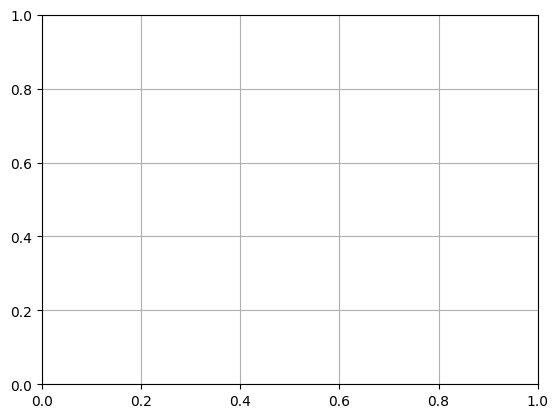

In [ ]:
points = np.array([[0,0], [2,0], [2,2], [1,1], [0,2]])
p = Polygon(list(points))
print(p.is_convex())
p.draw()
plt.grid()
plt.show()


Vegyük észre, hogy az `__repr__` metódust csak egyszer implementáltuk, mégis minden egyednek a saját típusát írja ki!
Az előző kód blokkot futtassuk le azután is, hogy a `draw` metódust implementáltuk.

# `Matplotlib.pyplot` könytár

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

A legtöbbet használt függvények a  `plot` és az `imshow`.

In [ ]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


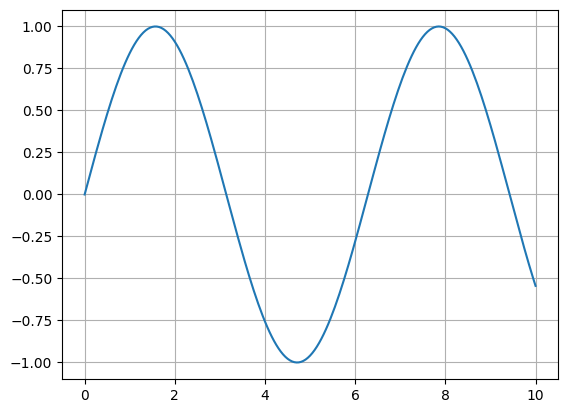

In [ ]:
x = np.linspace(0,10, 201)
print(x[:10])
plt.plot(x, np.sin(x))
plt.grid()
plt.show()

In [ ]:
from urllib.request import urlopen
import PIL

url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png"
img = np.array(PIL.Image.open(urlopen(url)))

img.shape

(220, 220, 3)

In [ ]:
import PIL
import urllib
img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
img.shape

(220, 220, 3)

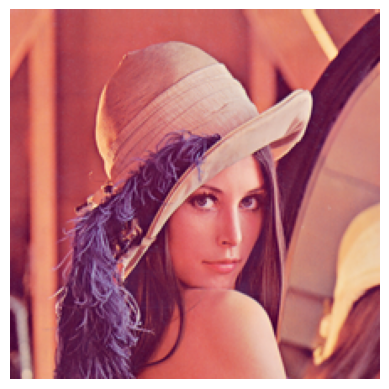

In [ ]:
plt.imshow(img)
plt.axis('off')

plt.show()

(-1.1, 1.1, -0.1, 2.1)

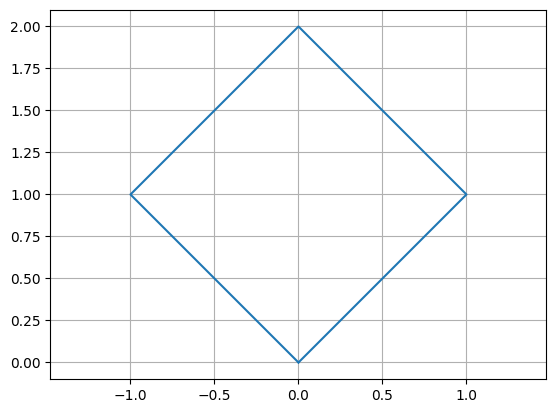

In [ ]:
plt.plot(*np.array(s.nodes)[[0,1,2,3,0]].T)
plt.grid()
plt.axis('equal')
# plt.axis('off')


In [ ]:
def draw(self,  *args, fill=False, **kwargs):
    nodes = self.nodes + self.nodes[:1]
    x, y = np.array(nodes).T
    if fill:
        plt.fill(x, y, alpha=0.5)
    plt.plot(x, y, *args, **kwargs)
    plt.axis('equal')

Polygon.draw = draw

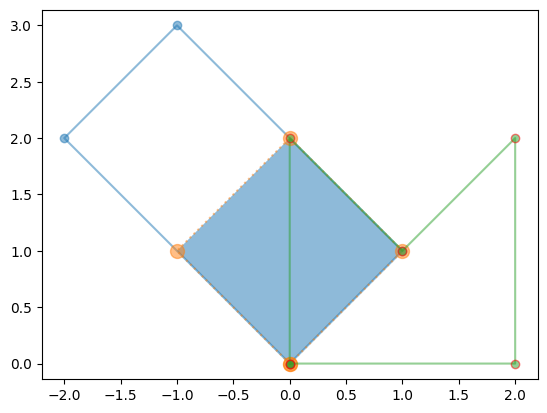

In [ ]:
t.draw('o-', alpha=0.5)
s.draw('o:', markersize=10, alpha=0.5, fill=True)
p.draw('o-', mec='r', alpha=0.5)
plt.show()

# `with` statement


## Mi történik a `with` statement alkalmazásakor?

### Mit lehet a with mögé írni?

Hasonlóan a `for`-hoz szinte bármit, aminek van két metódusa:

- `__enter__`
- `__exit__`

```python
with obj as x:
    do_something with x
```

Itt az `obj.__enter__()` hívás eredménye lesz az x értéke és a block végén **GARANTÁLTAN** végrehajtódik az `obj.__exit__(...)` hívás.
Az `__enter__` metódus végezheti az előkészítést, az `__exit__` a takarítást!

### Kell-e nekünk ezeket a metódusokat közvetlenül implementálni?

Valójában nem. Elegendő egy generátor függvényt megírni:

```python
import time

def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")
```
            

Így még csak egy generátort kapunk ami egyszer visszaad semmit (`None`), majd a következő iterációnál jelzi, hogy vége van a sorozatnak.

Próbáljuk ki `for`-ral

In [ ]:
import time

def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")

for x in timer():
    print(x)

None
run time: 0.000077


`with`-del hibát kapunk

In [ ]:
with timer() as x:
    print(x)

AttributeError: __enter__

A `contextlib` module `contextmanager` függvénye generátorból `contextmanager`-t készít.

In [ ]:
from contextlib import contextmanager
timer2 = contextmanager(timer)
with timer2() as x:
    print(x)

None
run time: 0.000043


Ha egy függvény akarunk alkalmazni egy függvényre, hogy azt átalakítsuk, de ugyanaz maradjon a neve akkor a python `@` szintakszist használja. Ilyenkor ,,dekoráljuk'' a függvényt. A `contextmanager` egy példa **dekorátor**ra.

```python
@contextmanager
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")
```
Példaként írjunk egy olyan contextmanager-t, ami jelzi nekünk, hogy mikor milyen hívás történik.

In [ ]:
@contextmanager
def print_whats_going_on(x):
    print("try blokk előtt")
    try:
        print("yield előtt")
        yield x
        print("yield után")
    except:
        print("except ág")
    finally:
        print("finally ág")
    print("try blokk után")

In [ ]:
with print_whats_going_on("hello") as x:
    print(f"{x=}")
print("with után")

print("-"*50)

with print_whats_going_on("hello") as x:
    print(f"{x=}")
    raise ValueError
print("with után")


try blokk előtt
yield előtt
x='hello'
yield után
finally ág
try blokk után
with után
--------------------------------------------------
try blokk előtt
yield előtt
x='hello'
except ág
finally ág
try blokk után
with után


In [ ]:
@contextmanager
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")

In [ ]:
t = timer()
with t:
    time.sleep(0.5)

run time: 0.500782


Használhatjuk-e többször a `timer`-ünket?

In [ ]:
t = timer()
print(f"first use of {t}")
with t:
    time.sleep(0.5)
print(f"second use of {t}")
with t:
    time.sleep(0.5)


first use of <contextlib._GeneratorContextManager object at 0x7f70ea505450>
run time: 0.500806
second use of <contextlib._GeneratorContextManager object at 0x7f70ea505450>


AttributeError: args

## Tudunk-e olyan contextmanagert készíteni, ami többször felhasználható?

pl.

```
with indented:
    indented.print("első")
    with indented:
        indented.print("második")
    indented.print("harmadik")
```

ahol kimenetként azt várnánk, hogy
```
  első
    második
  harmadik
```

In [ ]:
class Indent:
    def __init__(self, indent='  '):
        self.level = 0
        self.indent = indent

    def __enter__(self):
        self.level += 1
        return None

    def __exit__(self, *args):
        self.level -= 1

    def print(self, x):
        indent = self.indent*self.level
        x = str(x)
        print('\n'.join(indent+line for line in x.split('\n')))


In [ ]:
indented = Indent('...')
text = """Többsoros szöveg:
Első
Második
"""
with indented:
    indented.print("első")
    with indented:
        indented.print("második")
        with indented:
            indented.print(text)
    indented.print("harmadik")

...első
......második
.........Többsoros szöveg:
.........Első
.........Második
.........
...harmadik


# Ha maradna idő

## Feladatok előadásról

### Ismétlődések törlése


Egy adott sztringből távolítsuk el az egymás mellett álló ismétlődő karatereket.

Példa:
```
"kukkkuuuurrrriiiikuuuuuuuu" -> "kukuriku".
```

(Ez már volt korábban. Most keressünk elegánsabb megoldást, pl. az `itertools` könyvtár függvényeinek segítségével.)


In [ ]:

def remove_consecutive_duplicates(string):
    pass


### Számolás polinomokkal

Írjunk egy `Polynomial` osztályt, ahol a polinomot tároljuk el, mint az együtthatóinak listáját.

Implementáljuk két ilyen polinom összeadását (azaz írjuk meg az `__add__`, valamint a `__repr__`  metódust, hogy lássuk, mi egy ilyen osztálypéldány tartalma).

Egy polinom függvény is. Implementáljuk a `__call__` metódust is, ami kiértékeli a polinomot egy adott pontban!


In [ ]:
from itertools import dropwhile

In [ ]:
def format_term(k, coeff, fmt="x^{k}"):
    sep = "-" if coeff < 0 else "+"
    coeff = abs(coeff)
    c = f"{coeff}" if coeff != 1 else ""
    match k:
        case 0:
            x = ""
            c = f"{coeff}"
        case 1:
            x = "x"
        case _:
            x = fmt.format(k=k)
    return f"{c}{x}", sep

class Polynomial:
    def __init__(self, *coefficients):
        self.coeff = tuple(dropwhile(lambda x: x==0, coefficients))[::-1]

    def degree(self):
        return len(self.coeff)-1 if self.coeff else 0

    def __eq__(self, other):
        return isinstance(other, type(self)) and self.coeff == other.coeff

    def __add__(self, other):

        coeff_a = self.coeff
        coeff_b = other.coeff

        if len(coeff_a) < len(coeff_b):
            coeff_a, coeff_b = coeff_b, coeff_a

        coeff = list(coeff_a)

        for i, c in enumerate(coeff_b):
            coeff[i] += c

        return Polynomial(*reversed(coeff))

    def __sub__(self, other):
        return self+(-1)*other

    def __mul__(self, other):
        coeff = [0]*(len(self.coeff)+len(other.coeff)-1)
        for i, ca in enumerate(self.coeff):
            for j, cb in enumerate(other.coeff):
                coeff[i+j] += ca*cb

        return Polynomial(*reversed(coeff))

    def __rmul__(self, c):
        coeff = [c0*c for c0 in self.coeff]
        return Polynomial(*reversed(coeff))

    def leading_coeff(self):
        return self.coeff[-1] if self.coeff else 0

    def __divmod__(self, other):
        if not isinstance(other, type(self)):
            raise TypeError

        m = Polynomial()
        r = self
        main_coeff = other.leading_coeff()
        other_dg = other.degree()

        while r.degree() >= other_dg:
            c = r.leading_coeff()/main_coeff
            m += c*monomial(r.degree()-other_dg)
            r = self-m*other
        return m, r

    def __mod__(self, other):
        return divmod(self, other)[1]

    def __floordiv__(self, other):
        return divmod(self, other)[0]

    def __call__(self, x):
        value = 0
        for c in reversed(self.coeff):
            value *= x
            value += c
        return value

    def as_token_list(self, formatter, fmt):
        coeffs = [(k, coeff) for k, coeff in enumerate(self.coeff) if coeff != 0]
        if len(coeffs) == 0:
            coeffs = [(0, 0)]
        tokens = [token for k, coeff in coeffs for token in format_term(k, coeff, fmt)]
        if tokens[-1] == "+":
            tokens.pop()
        tokens.reverse()
        return tokens

    def __str__(self):
        return ''.join(self.as_token_list(format_term, "x^{k}"))

    def __repr__(self):
        return f"{type(self).__name__}({', '.join(map(str, reversed(self.coeff)))})"

    def _repr_latex_(self):
        formula = ''.join(self.as_token_list(format_term, "x^{{{k}}}"))
        return f"${formula}$"


def monomial(degree, unit=1):
    coeff = [unit]+[0]*degree
    return Polynomial(*coeff)

In [ ]:


p = Polynomial(-1, 0, -3)    # -> x^2 - 3
q = Polynomial(2, 0, -1, 1)  # -> 2x^3 + 3x + 1
display(p)
display(q)
display(p*q)
display(2*p)
print(str(q))

Polynomial(-1, 0, -3)

Polynomial(2, 0, -1, 1)

Polynomial(-2, 0, -5, -1, 3, -3)

Polynomial(-2, 0, -6)

2x^3-x+1


In [ ]:
p = Fraction(1,1)*p
q = Fraction(1,1)*q

m, r = divmod(q, p)
display(m)
display(r)
display(p)
display(q)
display(m*p)

Polynomial(-2, 0)

Polynomial(-7, 1)

Polynomial(-1, 0, -3)

Polynomial(2, 0, -1, 1)

Polynomial(2, 0, 6, 0)

#### Korábbi feladat

Írjunk egy függvényt, ami kiszámolja az első $n$ természetes szám $p$-ik hatványösszegét.

pl. `p = 0`-ra

```Python
def f0(n):
    return n
```

jó, mert $k^0=1$ ha $k=1,\dots,n$ és ezek összege pont $n$.

Ha `p = 1`, akkor

```Python
def f1(n):
    return n*(n+1)//2
```

jó, mert $\sum_{k=1}^n k = n(n+1)/2$.

Még `p = 2`-t is tanultuk

```Python
def f2(n):
    return n*(n+1)*(2*n+1)//6
```

Általános $p$-re tudunk-e ilyen függvényt írni?

In [ ]:
def mk_power_sum(p):
    def f(n):
        total = 0
        for k in range(1, n+1):
            total += k**p
        return total

    f.__doc__ = f"""
        {p}-ik hatványok összegét számolja
        """

    return f

In [ ]:
f2_slow = mk_power_sum(2)

In [ ]:
f2_slow?

In [ ]:
[f2_slow(i) for i in range(0, 10)]

In [ ]:
def f2_fast(n):
    return n*(n+1)*(2*n+1)//6

In [ ]:
%timeit f2_slow(10_000)
%timeit f2_fast(10_000)

### Ötlet

$$
    \sum_{k=r}^n  \binom{k}{r} = \binom{n+1}{r+1}
$$

**Bizonyítás.**
$\{1,2,\dots,n+1\}$-ből válasszunk ki $r+1$ különböző számot.

Összes lehetőség:
$$
\binom{n+1}{r+1}.
$$

Számoljuk meg az eseteket aszerint szétbontva is, hogy legnagyobb kiválasztott szám mivel egyenlő.

Ha a legnagyobb szám $k+1$, akkor a maradék $r$ számot $\{1,2,\dots, k\}$ közül választjuk. Így az esetek száma
$$
    \sum_{k+1=r+1}^{n+1} \binom{k}{r} =  \sum_{k=r}^{n} \binom{k}{r}
$$  
$k+1$ helyett $k$ az összegzési változó

Ugyanez másképp.

$$
\binom{k}{r} = \frac{1}{r!} k(k-1)\cdots(k-r+1) = \frac{1}{r!}p_r(k-r+1),\quad\text{ahol}\quad p_r(x) = x(x+1)\cdots(x+r-1)
$$
és
$$
    \sum_{j=1}^{n-r+1} \frac{1}{r!}p_r(j) = \frac{1}{(r+1)!}p_{r+1}(n+1-(r+1)+1)= \frac{1}{(r+1)!} p_{r+1}(n-r+1)\quad\text{minden $n\geq r$ és $r\geq 0$-ra}
$$

Az összegzés felső határa és $p_{r+1}$ argumentuma ugyanaz, azaz

$$
\sum_{j=0}^{n} p_r(j) = \frac{1}{r+1}p_{r+1}(n)
$$

**Lineáris algebra.**

$$
p_0\equiv 1,\quad p_1(x)=x,\quad p_2(x)=x(x+1),\quad\dots,\quad p_r(x)=x(x+1)\cdots(x+r-1)
$$

bázis a legfeljebb $r$-edfokú polinomok vektorterében.

$$
    x^r = \sum_{i=0}^r a_i p_i(x)
$$
és
$$
    \sum_{k=0}^n k^r = \sum_{k=0}^n \sum_{i=0}^r a_i p_i(k) =  \sum_{i=0}^r a_i  \sum_{k=0}^n p_i(k) = \sum_{i=0}^r \frac{a_i}{r+1}  p_{i+1}(n)
$$


### Összefoglalva

- Egy polinomot az együtthatókkal ábrázolhatunk.
- Kellene egy függvény, ami a természetes $1, x, x^2,\dots$ bázisban felírt polinomot a $p_0,p_1,\dots$ bázisban ír fel.
- $p_0, p_1, \dots,$ bázisban az összegzés könnyű, lényegében arrébb kell tolni az együtthatókat.
- A $p_0,p_1,\dots$ bázisban felírt polinomot vagy visszaszámoljuk a természetes bázisba, vagy megírjuk a függvényt, ami kiértékeli a függvényt egy adott pontban.

Vegyük észre, hogy $p_0$ azonosan 1, $p_1(0)=0$, $p_2(0)=p_2(-1)=0$, stb.

Ha $f=\sum_i a_i p_i$, akkor
$$
    f(0) = \sum_i a_i p(0) = a_0, \quad f(-1) = a_0 p_0(-1) + a_1 p_1(-1),\quad f(-k) = a_0 p_0(-k) + a_1 p_1(-k) + \cdots + a_k p_k(-k).
$$
amiből

$$
\begin{align*}
    a_0 & = f(0)\\
    a_1 & = \frac{f(-1) - a_0 p_0(-1)}{p_1(-1)}\\
    \vdots\\
    a_k & = \frac{f(-k) - \sum_{j=0}^{k-1} a_j p_j(-k)}{p_{k}(-k)}\\
    \vdots
\end{align*}
$$  
Kihasználhatjuk még, hogy
$$
p_k(-k)=(-k)(-k+1)\cdots(-k+(k-1))=(-1)^k k!.
$$

In [ ]:
def basis():
    i = 0
    p = Polynomial(1)
    while True:
        yield p
        p *= Polynomial(1,i)
        i += 1


In [ ]:
from itertools import islice

In [ ]:
for i, p in enumerate(islice(basis(), 5), 1):
    display(p)
    print(f"{i=}, {p(-i)=}")
    print("-"*20)

Polynomial(1)

i=1, p(-i)=1
--------------------


Polynomial(1, 0)

i=2, p(-i)=-2
--------------------


Polynomial(1, 1, 0)

i=3, p(-i)=6
--------------------


Polynomial(1, 3, 2, 0)

i=4, p(-i)=-24
--------------------


Polynomial(1, 6, 11, 6, 0)

i=5, p(-i)=120
--------------------


In [ ]:
def mk_fast_power_sum(p: Polynomial) -> Polynomial:
    q = Polynomial()
    q0 = Polynomial()

    it = iter(basis())
    i = 0

    while q0 != p:
        pi = next(it)
        if i > 0:
            q += (coeff/i)*pi
        coeff = ((p(-i) - q0(-i))/pi(-i))
        q0 += coeff*pi
        i += 1

    q += (coeff/i)*next(it)
    return q

In [ ]:
mk_fast_power_sum(monomial(8))

Polynomial(0.1111111111111111, 0.5, 0.6666666666666643, 0.0, -0.46666666666715173, 0.0, 0.22222222222444543, 0.0, -0.03333333333284827, 0.0)

In [ ]:
from fractions import Fraction

In [ ]:
q = 30*mk_fast_power_sum(monomial(4, Fraction(1,1)))
display(q)

Polynomial(6, 15, 10, 0, -1, 0)

In [ ]:
q(0), q(-1), q(Fraction(-1,2)), q.degree()

(Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), 6)

In [ ]:
f = monomial(1)*Polynomial(1,1)*Polynomial(2,1)
f

Polynomial(2, 3, 1, 0)

In [ ]:
p = Polynomial(3,3,-1)
q - p*f
p

Polynomial(3, 3, -1)

#### Gyors ellenőrzés.

In [ ]:
%%ipytest

def test_fast_power_sum():
    p0 =  Polynomial(Fraction(1, 1),0)
    p1 = p0
    for i in range(1, 4):
        f = mk_fast_power_sum(p1)
        p1 *= p0
        g = mk_power_sum(i)
        for n in range(1000):
            assert f(n) == g(n)

In [ ]:
f2 = mk_fast_power_sum(Polynomial(Fraction(1,1), 0, 0))
%timeit f2_slow(10_000)
%timeit f2(10_000)
%timeit f2_fast(10_000)

In [ ]:
f2.__dict__


# Egy gráfelméleti algoritmus

## Feladat

Adott egy `n` csúcsú irányítatlan gráf az élek listájával. A gráf csúcsait `0`-tól `n-1`-ig címkéztük meg, az éleket pedig a végpontokkal.

Emellett adott egy kiindulási pont és egy végpont. Azt szeretnénk eldönteni, hogy el lehet-e jutni a kiindulási pontból a végpontba a gráf éleit használva.

Gondolhatunk arra, hogy a gráf egy úthálózatot ír le és a kérdés az, hogy el tudunk-e jutni `A`-ból `B`-be.

Pl. `n = 3`, élek `edges = [[0,1], [1,2], [2,0]]`, `A =  0`, `B = 2`.

Gráfok megjelenítésére egy hasznos könyvtár a `graphviz`.

In [ ]:
import importlib
if importlib.util.find_spec('graphviz') is None:
    ! pip install graphviz
import graphviz

In [ ]:
edges = [[0,1], [1,2], [2,0]]
g0 = graphviz.Graph()

g0.edges([(str(a), str(b)) for a, b in edges])
g0

A gráf összefüggő, tetszőleges `A`, `B` esetén a válasz: `True`

In [ ]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
A = 0
B = 5

g1 = graphviz.Graph()
g1.edges([(str(a), str(b)) for a, b in edges])
g1

Nincs út 0 és 5 között. A válasz: `False`

Összefüggőségi komponenseket szeretnénk számolni.



## Ötlet.

Az él nélküli gráfból indulunk ki. Itt egy elemű komponensek vannak.

Minden komponensből válasszunk egy reprezentáns és minden $i$ pontra feljegyezzük, melyik komponensben van.




In [ ]:
def show_graph(roots, direction = 'LR'):
    g = graphviz.Digraph(graph_attr={'rankdir': direction})
    g.edges((str(i), str(r)) for i, r in enumerate(roots))
    return g

In [ ]:
n = 5
roots = [i for i in range(n)]
display(show_graph(roots, 'TD'))

ha behúzzuk a $(0, 1)$ élet, akkor $0$ és $1$ azonos komponensbe kerül. Választhatunk a két összeuniózott komponens reprezentánsa között, legyen pl. 1

In [ ]:
roots[0] = 1
display(show_graph(roots, 'TD'))

Ha most a (0, 2) élet akarjuk behúzni, akkor nem állíthatjuk át `roots[0]`. Meg kell keresnünk `0` komponensének reprezentását, ez 1 és vagy `roots[1]`-et állítjuk 2 -re, vagy `roots[2]`-t 1-re.

In [ ]:
def find(roots, a):
    while a != roots[a]:
        a = roots[a]
    return a

In [ ]:
find(roots, 0), find(roots, 2)

In [ ]:
def union(roots, a, b):
    ra = find(roots, a)
    rb = find(roots, b)
    roots[ra] = rb

In [ ]:
union(roots, 0, 2)
print(f"After union(0, 2) {roots=}")
display(show_graph(roots))

union(roots, 3, 4)
print(f"After union(3, 4) {roots=}")
print(roots)
display(show_graph(roots))

union(roots, 3, 2)
print(f"After union(3, 2) {roots=}")
print(roots)
display(show_graph(roots))

Ezután az a kérdés, hogy el lehet-e jutni `A`-ból, `B`-be könnyen eldönthető. Ha `A` és `B` azonos komponensben van, akkor `A` és `B` között megy út az eredeti gráfban, különben nem.

1. példa
`n = 3`, élek `edges = [[0,1], [1,2], [2,0]]`, `A =  0`, `B = 2`.

In [ ]:
def show_edges(edges, direction='LR'):
    g = graphviz.Graph(graph_attr={'rankdir': direction})
    g.edges([(str(a), str(b)) for a, b in edges])
    return g

In [ ]:
n = 3
edges = [[0,1], [1,2], [2,0]]
A =  0
B = 2

display(show_edges(edges, 'TD'))
print(f"Eredeti gráf")
print("="*50)

roots = [i for i in range(n)]
for a, b in edges:
    union(roots, a, b)

display(show_graph(roots))
print(f"{A=} és {B=} {'azonos' if find(roots, A)==find(roots, B) else 'különböző'} komponensben van")

2. példa

In [ ]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
A = 0
B = 5

display(show_edges(edges))
print(f"Eredeti gráf")
print("="*50)

roots = [i for i in range(n)]
for a, b in edges:
    union(roots, a, b)

display(show_graph(roots))
print(f"{A=} és {B=} {'azonos' if find(roots, A)==find(roots, B) else 'különböző'} komponensben van")


Látszik, hogy először létre kell hoznunk a `roots` tömböt, majd utána ezzel kell számolnunk.

Célszerű egy osztályt léterhozni:

In [ ]:
class UnionFind:
    def __init__(self, n):
        self.roots = [i for i in range(n)]

    def find(self, a):
        while a != self.roots[a]:
            a = self.roots[a]
        return a

    def union(self, a, b):
        ra, rb = self.find(a), self.find(b)
        if ra != rb:
            self.roots[ra] = rb
        return self

    def show(self, *args, **kwargs):
        display(show_graph(self.roots, *args, **kwargs))

Mi történik, ha nagyobb gráfunk van?

In [ ]:
n = 10
edges = [(0,i+1) for i in range(n-1)]
display(show_edges(edges, 'TD'))

uf = UnionFind(n)
for a, b in edges:
    uf.union(a, b)

uf.show()

Valahányszor behúzzuk a $(0, i)$ élet, meg kell keresni $0$ reprezentánsát. $k$ él behúzása után $k$-lépéssel találjuk meg. Ha 10 helyett 10_000 méretű a gráf ez nem fog működni.

### Javítási lehetőségek.

- Amikor megkeressük $i$ reprezentánsát végig megyünk a reprezentánshoz vezető úton. Minden meglátogatott csúcsra ismerté válik a reprezentáns értéke. Ezt beírhatjuk a `roots` tömbe. (path compression)

- A nagyobb komponensbe kössük be a kisebbet és ne fordítva. Ehhez  a ,,méretet'' nyilván kell tartani.

In [ ]:
def find_better(roots, a):
    ra = roots[a]
    if a != ra:
        ra = find_better(roots, ra)
        roots[a] = ra
    return ra

def find_better_without_recursion(roots, a):
    stack = []

    ra = roots[a]
    while a != ra:
        stack.append(a)
        a = ra
        ra = roots[a]

    while stack:
        roots[stack.pop()] = ra

    return ra


def union_sizes(roots, sizes, a, b):
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    if ra != rb:
        if sizes[ra] < sizes[rb]:
            ra, rb = rb, ra
        roots[rb] = ra
        sizes[ra] += sizes[rb]

def union_ranks(roots, ranks, a, b):
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    if ra != rb:
        if ranks[ra] < ranks[rb]:
            ra, rb = rb, ra
        roots[rb] = ra
        if ranks[ra] == ranks[rb]:
            ranks[ra] += 1

In [ ]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]

for a, b in edges:
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    roots[ra] = rb

display(show_graph(roots, 'LR'))


In [ ]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]

for a, b in edges:
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    roots[rb] = ra

display(show_graph(roots, 'TD'))


In [ ]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]
sizes = [1]*n

for a, b in edges:
    union_sizes(roots, sizes, a, b)

display(show_graph(roots, 'TD'))


In [ ]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]
ranks = [0]*n

for a, b in edges:
    union_ranks(roots, ranks, a, b)

display(show_graph(roots, 'TD'))


### Szokásos implementáció

In [ ]:
class UnionFind:
    def __init__(self, n):
        self.roots = [i for i in range(n)]
        self.sizes = [1]*n

    def find(self, a):
        ra = self.roots[a]
        if a != ra:
            ra = self.find( ra)
            self.roots[a] = ra
        return ra

    def union(self, a, b):
        ra = self.find(a)
        rb = self.find(b)
        if ra != rb:
            if self.sizes[ra] < self.sizes[rb]:
                ra, rb = rb, ra
            self.roots[rb] = ra
            self.sizes[ra] += self.sizes[rb]


In [ ]:
uf = UnionFind(10)
print(uf)
uf.union(1, 2)
print(uf)
uf.union(5, 9)
uf.union(6, 7)
print(uf)

uf

`__str__` és `__repr__` metódusok

In [ ]:
def as_set(seq):
    return f"{{{', '.join(map(str, seq))}}}"

def uf_str(self):
    components = {}
    for a in range(len(self.roots)):
        ra = self.find(a)
        if ra not in components:
            components[ra] = []
        components[ra].append(a)
    return f"{{{ ', '.join(map(as_set, components.values()))}}}"

def uf_repr(self):
    return f"{type(self).__name__}({len(self.roots)})"

# Így is lehet:
UnionFind.__str__ = uf_str
UnionFind.__repr__ = uf_repr

In [ ]:
uf = UnionFind(10)
print(uf)
uf.union(1, 2)
print(uf)
uf.union(5, 9)
uf.union(6, 7)
print(uf)

uf

### További kérdések

- Tegyük fel, hogy a komponensek száma érdekel minket. Hogyan oldanánk, meg, hogy konstans idő alatt megkaphassuk.
- Tegyük fel, hogy a legnagyobb komponens méretet érdekel minket. Hogyan oldanánk, meg, hogy konstans idő alatt megkaphassuk.
- Hogyan ellenőriznénk, hogy két partíció azonos?

# Faktoriális értékének közelítése

Mekkora $n!$, ha $n$ nagy?

Ötlet:
$$
    \log n! = \sum_{k=1}^n \log k \approx \int_1^{?} \log x dx = \left[ x(\log x-1)\right]_{x=1}^{x=?}
$$

In [ ]:
import matplotlib.pyplot as plt
import math

def subdivision(a, b, n):
    d = (b-a)/n
    return [a+i*d for i in range(n+1)]

def add_function_curve(f, a, b, n=100):
    xs = subdivision(a, b, n)
    fxs = [f(x) for x in  xs]
    plt.plot(xs, fxs, "r-")

## Téglalap közelítés

In [ ]:
k_values = [k for k in range(1, 11)]
for k in k_values:
    plt.fill_between([k+i for k in k_values for i in range(2)], [math.log(k) for k in k_values for i in range(2)], color='lightblue')

add_function_curve(math.log, 1, 11)


A hiba:

In [ ]:
def primitive_function(x):
    return x*(math.log(x)-1)

def rectangle_error(k):
    return primitive_function(k+1)-primitive_function(k)-math.log(k)

def cummulative_error(n, error_fun=rectangle_error):
    return sum(error_fun(k) for k in range(1, n+1))

In [ ]:
for n in [10, 100, 1000]:
    print(f"{n=}, {cummulative_error(n)=}")

### Javítás, trapéz összeg közelítés

Téglalapok helyett minden egység intervallumon a beírt trapézt  használjuk.

In [ ]:
k_values = [k for k in range(1, 11)]
for k in k_values:
    plt.fill_between(k_values, [math.log(k) for k in k_values], color='lightblue')

add_function_curve(math.log, 1, 10)


In [ ]:
def error_fun(x):
    k, t = divmod(x, 1)
    return math.log(x) - ((1-t)*math.log(k) + t*math.log(k+1))

xs = subdivision(1, 10, 100)
plt.fill_between(xs, [error_fun(x) for x in xs], color='lightblue')
add_function_curve(error_fun, 1, 10, 500)


In [ ]:
def modified_error_fun(x):
    k = x//1
    return k*k*error_fun(x)

for a in [1, 100, 1000, 10000]:
    b = a+10
    xs = subdivision(a, b, 1000)

    plt.fill_between(xs, [modified_error_fun(x) for x in xs], color='lightblue')
    add_function_curve(modified_error_fun, a, b, 1000)
    plt.show()

In [ ]:
def trapezoid_error(k):
    return primitive_function(k+1)-primitive_function(k)-0.5*(math.log(k)+math.log(k+1))


In [ ]:
for n in [10, 100, 1000]:
    print(f"{n = :>4}, {cummulative_error(n, trapezoid_error) = :.8f}")

## Látszik, hogy a hiba lassan nő. Tudunk-e felső becslést adni rá?

$$
    \int_{k}^{k+1} \log x dx = \int_0^1 \log(k+x) dx
$$

A beírt trapéz területe integrállal

$$
    \int_0^1 x\log(k+1)+(1-x)\log(k) dx
$$

Tudjuk-e becsülni a két integrandus különbségét?
$$
    \log(k+x) - (x\log(k+1)+(1-x)\log(k))
$$

Átalakítás mindkét tagból levonunk $\log(k)$-t:
$$
    \log(k+x) - \log(k) - (x\log(k+1)+(1-x)\log(k) -\log(k)) = \log(1+\tfrac{x}{k}) - x\log(1+\tfrac1k)
$$


In [ ]:
xs = subdivision(0, 1, 100)

for k in range(1, 4):
    plt.fill_between(xs, [math.log(k+x)-math.log(k) for x in xs], [math.log(k+1)*x+math.log(k)*(1-x)-math.log(k) for x in xs], color="blue")

plt.grid()

A logaritmus függvény konkáv, a derivált monoton fogy ($1/x$) és egy beírt húr mindig a végponthoz behúzott érintő egyenesek alatt van.

$$
    \log (1+x)\leq x
$$

ezért
$$
    \log(1+x/k) - x \log(1+1/k)\leq \frac xk - x\log(1+1/k) = x(1/k -\log(1+1/k))
$$

de
$$
    \log(1+1/k) = \log\frac{k+1}{k} = -\log\frac{k}{k+1} = -\log(1-1/(k+1)) \geq \frac1{k+1}
$$

Így

$$
    \log(1+x/k) - x \log(1+1/k)\leq x\left(\frac1k-\frac1{k+1}\right)
$$
és
a $k$. intervallumon elkövetett hiba legfeljebb
$$
    \int_{0}^{1} \log(k+x) - ((1-x)\log(k)+x\log(k+1))dx = \int_0^1 x dx \left(\frac1k -\frac1{k+1}\right)
$$
A hibák összege legfeljebb:
$$
    \frac12 \sum_{k=1}^\infty \frac1k -\frac1{k+1} =\frac12
$$

Összefoglalva:

$$
    \log n! = \int_1^n \log x dx + \frac12 \log n + r_n = n(\log(n) - 1) + 1 + \frac12 \log (n) + r_n
$$
ahol $r_n$ a közelítés hibája az első $n$ intervallumon
$$
    r_n = \sum_{k=1}^n \int_0^1 \log(1+x/k)-x\log(1+1/k)dx \leq 1/2
$$
$(r_n)$ monoton nő, ezért létezik limesze.

Visszaírva faktoriálisra:

$$
    n! = \sqrt{n}\left(\frac{n}{e}\right)^n c_n
$$
ahol $c_n=e^{1+r_n}\leq e^{3/2}$

Analízisben a Wallis formula következményeként szerepel

$$
\lim c_n = \sqrt{2\pi}
$$

Ez a nevezetes **Stirling** formula:
$$
 \frac{n!}{\sqrt{2\pi n}\left(\frac{n}{e}\right)^n} \to 1
$$


### Wallis formula középiskolai eszközökkel


Középiskolai tudást használva is kiszámíthatnánk a limeszt. Ehhez a
$$
    I_n = \int_{0}^{\pi/2} \cos^n(x) dx
$$
sorozatot kellen vizsgálni. Parciálisan integrálva:
$$
    I_{n+2} = \int_{0}^{\pi/2} (1-\sin^2x)\cos^n(x) dx
    = I_n - \int_{0}^{\pi/2} \sin^2(x)\cos^n(x) dx
$$
ahol
$$
\begin{aligned}
-\int_{0}^{\pi/2} \sin^2(x)\cos^n(x) dx
& =
\frac1{n+1} \int_{0}^{\pi/2} \sin(x)(\cos^{n+1}(x))' dx
\\
&=
\frac{1}{n+1}\left[\sin(x)\cos^{n+1}(x)\right]_{x=0}^{x=\pi/2}-\frac{1}{n+1}\int_0^{\pi/2}\cos^{n+2}(x)dx
\\
&= -\frac{1}{n+1} I_{n+2}
\end{aligned}
$$

**Összefoglalva**:

$$
    I_{n+2} = \int_{0}^{\pi/2} (1-\sin^2x)\cos^n(x) dx
    = I_n - \frac{1}{n+1}I_{n+2} = \frac{n+1}{n+2} I_n
$$

Ha $n=2k$ páros, akkor
$$
    I_{2k} = \frac{2k-1}{2k} I_{2k-2} = \frac{(2k-1)(2k-3)}{2k(2k-2)} I_{2k-4} =\cdots=\frac{(2k-1)!!}{2^k k!}I_0=\frac{1}{2^{2k}}\binom{2k}{k}\frac{\pi}2
$$
Ha $n=2k+1$ páratlan, akkor
$$
    I_{2k+1} = \frac{2k}{2k-1} I_{2k-3} = \frac{(2k)(2k-2)}{(2k+1)(2k-1)} I_{2k-3} =\cdots=\frac{2^k k!}{(2k+1)!!}I_1=\frac{2^{2k}}{(2k+1)\binom{2k}{k}}=\frac{2^{2(k+1)}}{2(k+1)\binom{2(k+1)}{k+1}}
$$
Mivel $(I_n)$ monoton fogyó:
$$
    I_{2k-1}=\frac{2^{2k}}{2k\binom{2k}{k}}  > I_{2k} = \frac{1}{2^{2k}}\binom{2k}{k}\frac{\pi}2  > I_{2k+1}= \frac{2^k k!}{(2k+1)!!}I_1=\frac{2^{2k}}{(2k+1)\binom{2k}{k}}
$$
Átrendezés után
$$
\frac{1}{2k\pi/2} < \left(\frac{1}{2^{2k}}\binom{2k}{k}\right)^2 < \frac{1}{(2k+1)\pi/2}
$$
és
$$
    \lim_{n\to\infty}\sqrt{n} \frac{1}{2^{2n}}\binom{2n}{n} = \frac{1}{\sqrt{\pi}}
$$

Másfelől a faktoriális közelítését használva:
$$
    \sqrt{n}\frac1{2^{2n}}\binom{2n}{n}
    = \sqrt{n} \frac1{2^{2n}} \frac{c_{2n} \sqrt{2n} \left(\frac{2n}{e}\right)^{2n}}{c_n^2 n\left(\frac{n}{e}\right)^{2n}}
    \to \lim_{n\to\infty} \frac{\sqrt{2}c_{2n}}{c_n^2} = \lim_{n\to\infty}\frac{\sqrt{2}}{c_n}=\frac1{\sqrt{\pi}}
$$
amiből $\lim_n c_n =\sqrt{2\pi}$.

